<a href="https://colab.research.google.com/github/yogi2099/Big-Mart-Sales-EDA-and-Prediction/blob/master/Big_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling as pp

In [0]:
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

In [4]:
df_train =pd.read_csv('/content/drive/My Drive/TrainBig.txt')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


In [5]:
df_test = pd.read_csv('/content/drive/My Drive/TestBig.txt')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038,Dairy,87.320,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
pp.ProfileReport(df_train)

Number of variables,12
Number of observations,8523
Total Missing (%),3.8%
Total size in memory,799.1 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
pp.ProfileReport(df_test)

Number of variables,11
Number of observations,5681
Total Missing (%),4.1%
Total size in memory,488.3 KiB
Average record size in memory,88.0 B
Numeric,4
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Univariate Analysis

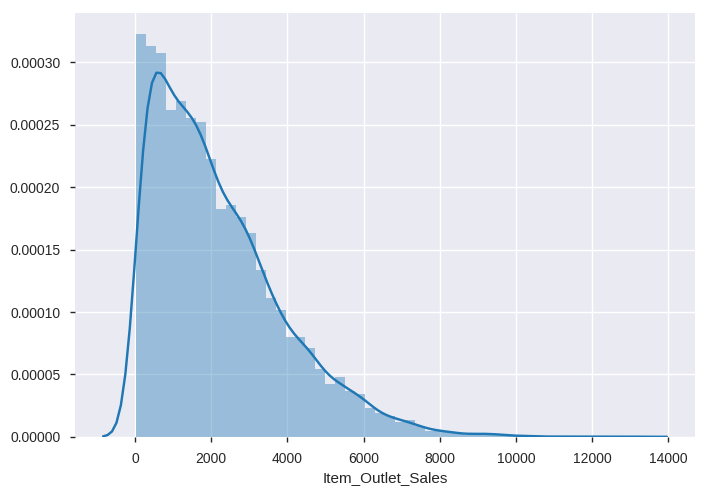

In [9]:
sns.distplot(df_train.Item_Outlet_Sales)
# Item outlet sales is right skewed

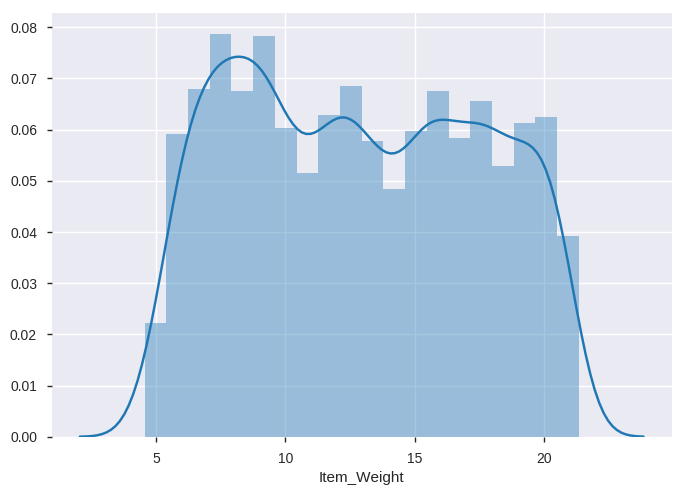

In [10]:
sns.distplot(df_train[pd.notnull(df_train.Item_Weight)]['Item_Weight'])
# Item Weight has null values

In [11]:
df_train.Item_Weight.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

count   7060.000
mean      12.858
std        4.643
min        4.555
25%        8.774
50%       12.600
75%       16.850
95%       20.250
99%       20.850
max       21.350
Name: Item_Weight, dtype: float64

In [12]:
df_train.Item_Visibility.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

count   8523.000
mean       0.066
std        0.052
min        0.000
25%        0.027
50%        0.054
75%        0.095
95%        0.164
99%        0.226
max        0.328
Name: Item_Visibility, dtype: float64

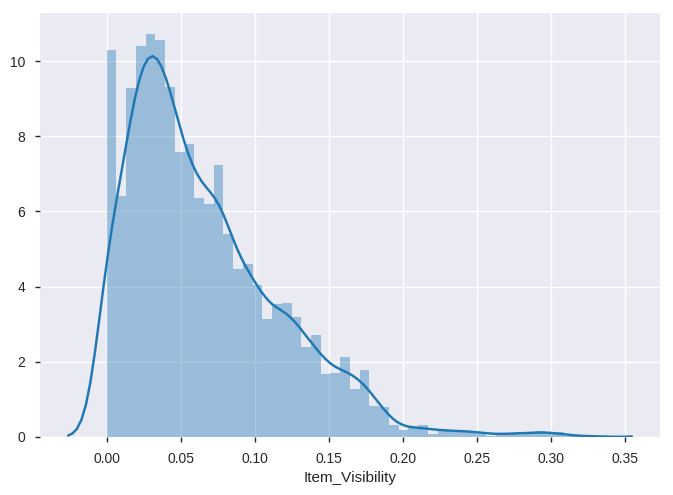

In [13]:
sns.distplot(df_train.Item_Visibility)
#Item visibility has many zero values

In [14]:
df_train[df_train.Item_Visibility==0]['Item_Outlet_Sales'].describe()

count     526.000
mean     2222.543
std      1741.803
min        33.290
25%       891.340
50%      1774.024
75%      3182.524
max     11445.102
Name: Item_Outlet_Sales, dtype: float64

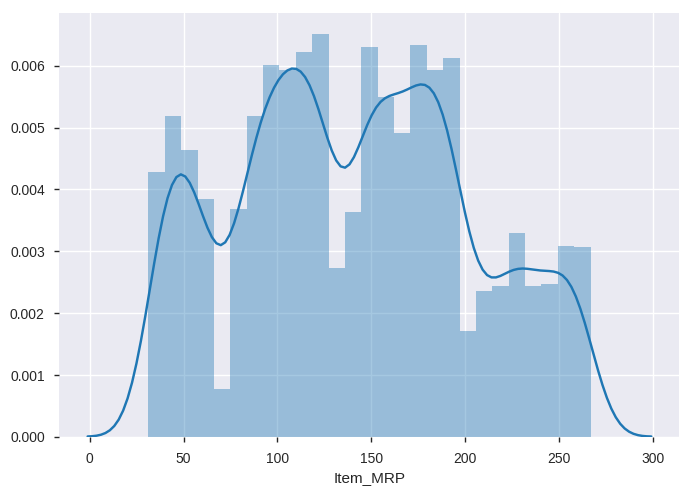

In [15]:
sns.distplot(df_train.Item_MRP)

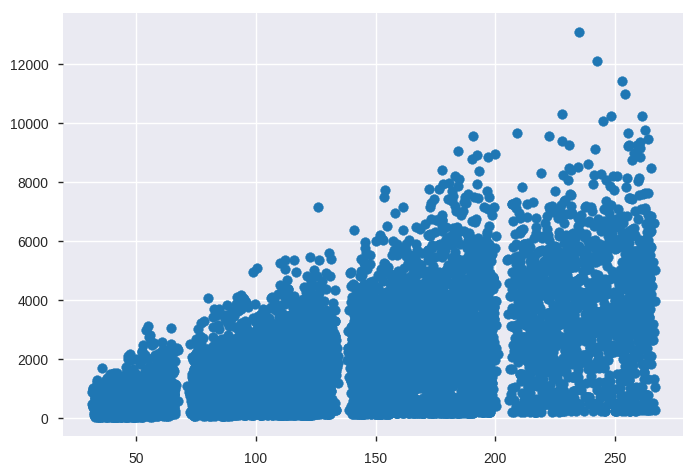

In [16]:
plt.scatter(df_train.Item_MRP,df_train.Item_Outlet_Sales)

In [17]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

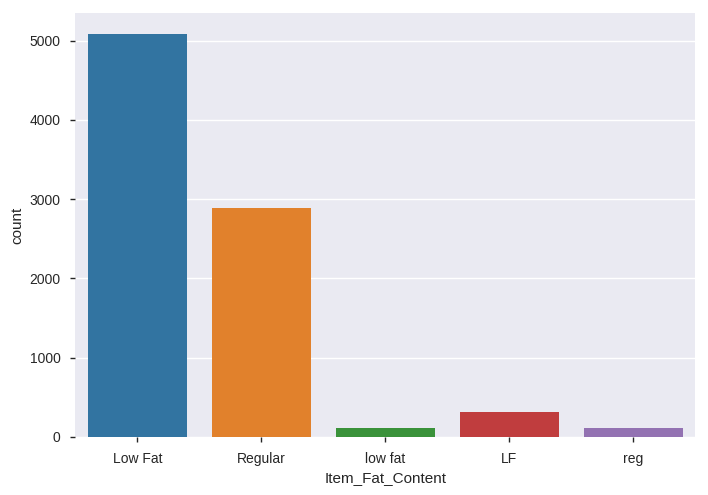

In [18]:
sns.countplot(df_train.Item_Fat_Content)

In [0]:
df_train.Item_Fat_Content[df_train.Item_Fat_Content=='reg']='Regular'

In [0]:
df_train.Item_Fat_Content[df_train.Item_Fat_Content=='LF']='Low Fat'

In [0]:
df_train.Item_Fat_Content[df_train.Item_Fat_Content=='low fat']='Low Fat'

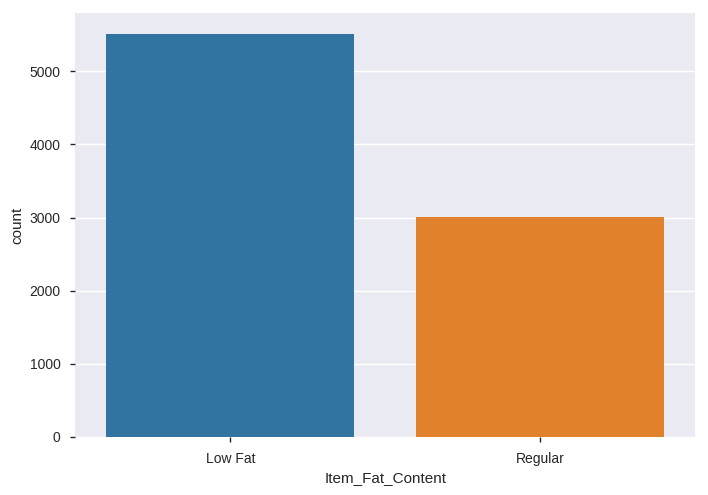

In [22]:
sns.countplot(df_train.Item_Fat_Content)

In [0]:
df_test.Item_Fat_Content = df_test.Item_Fat_Content.replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])

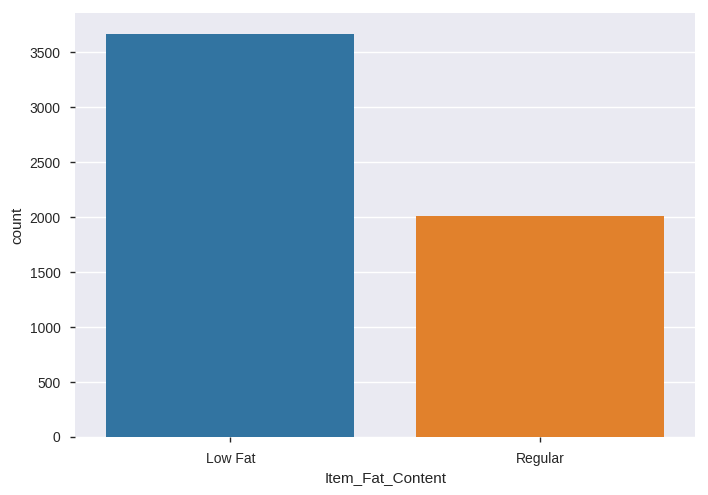

In [24]:
sns.countplot(df_test.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

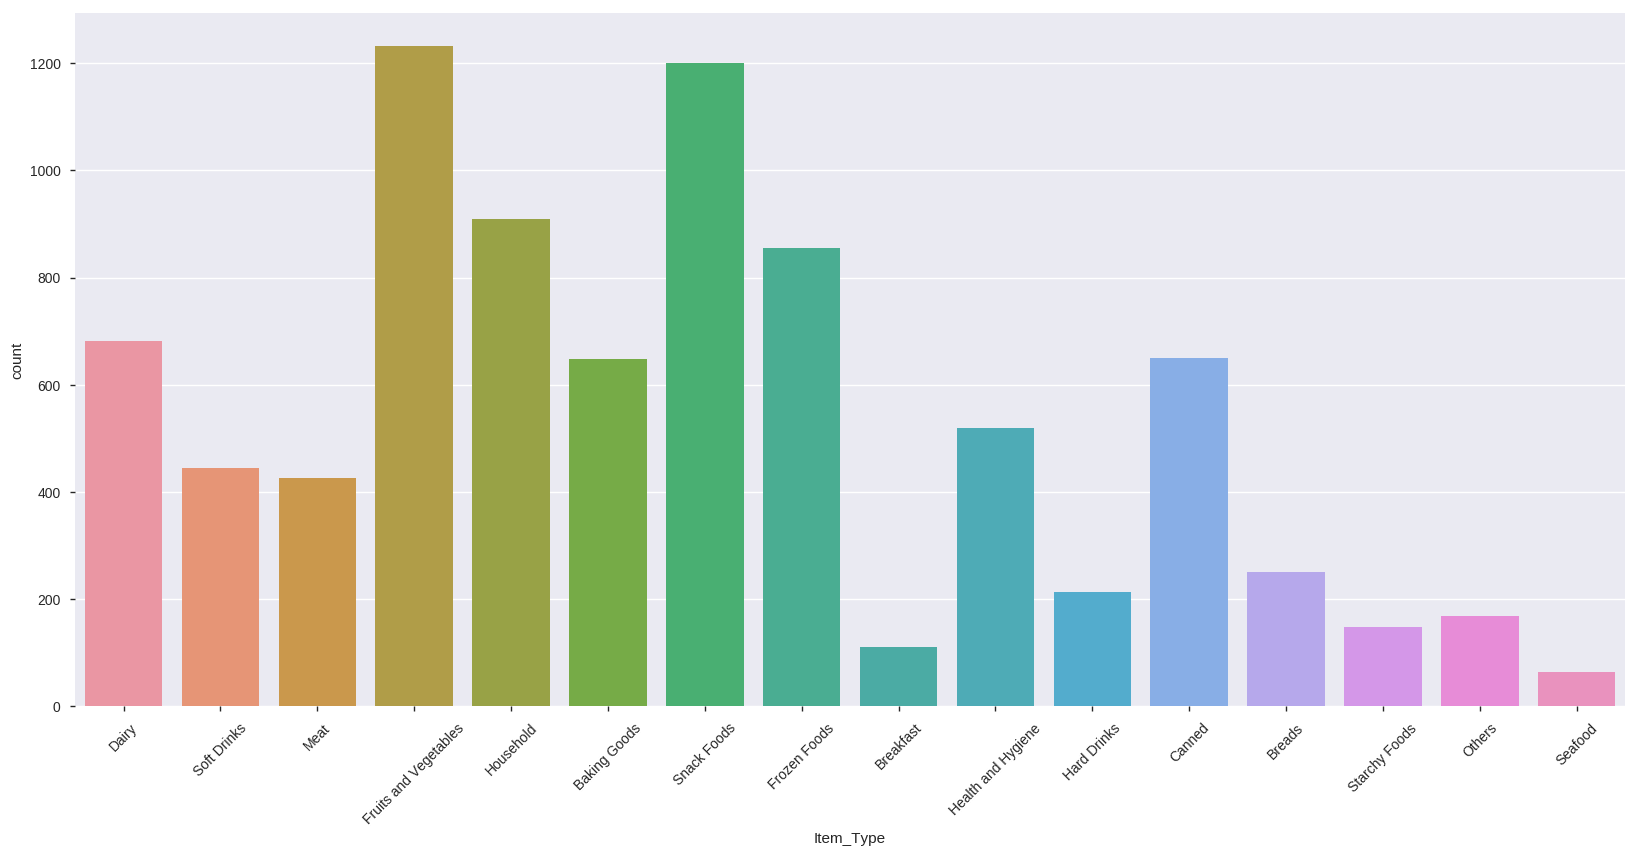

In [25]:
plt.figure(figsize=[20,9])
sns.countplot(df_train.Item_Type)
plt.xticks(rotation =45)

## Bi-Variate Analysis

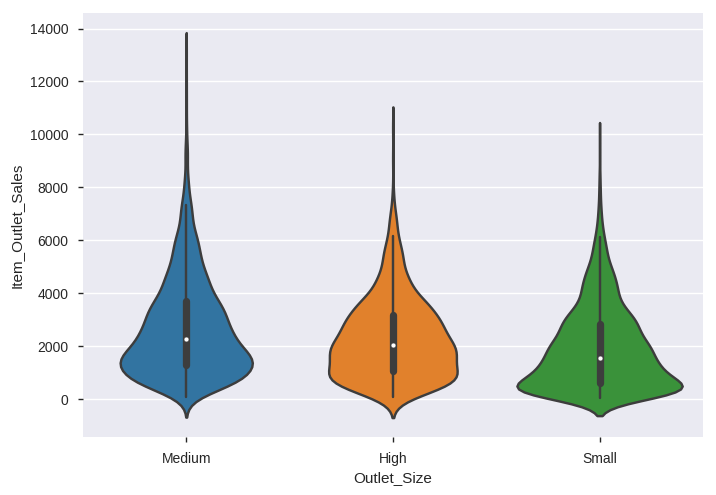

In [26]:
sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_train)

Text(0, 0.5, 'Item_Outlet_Sales')

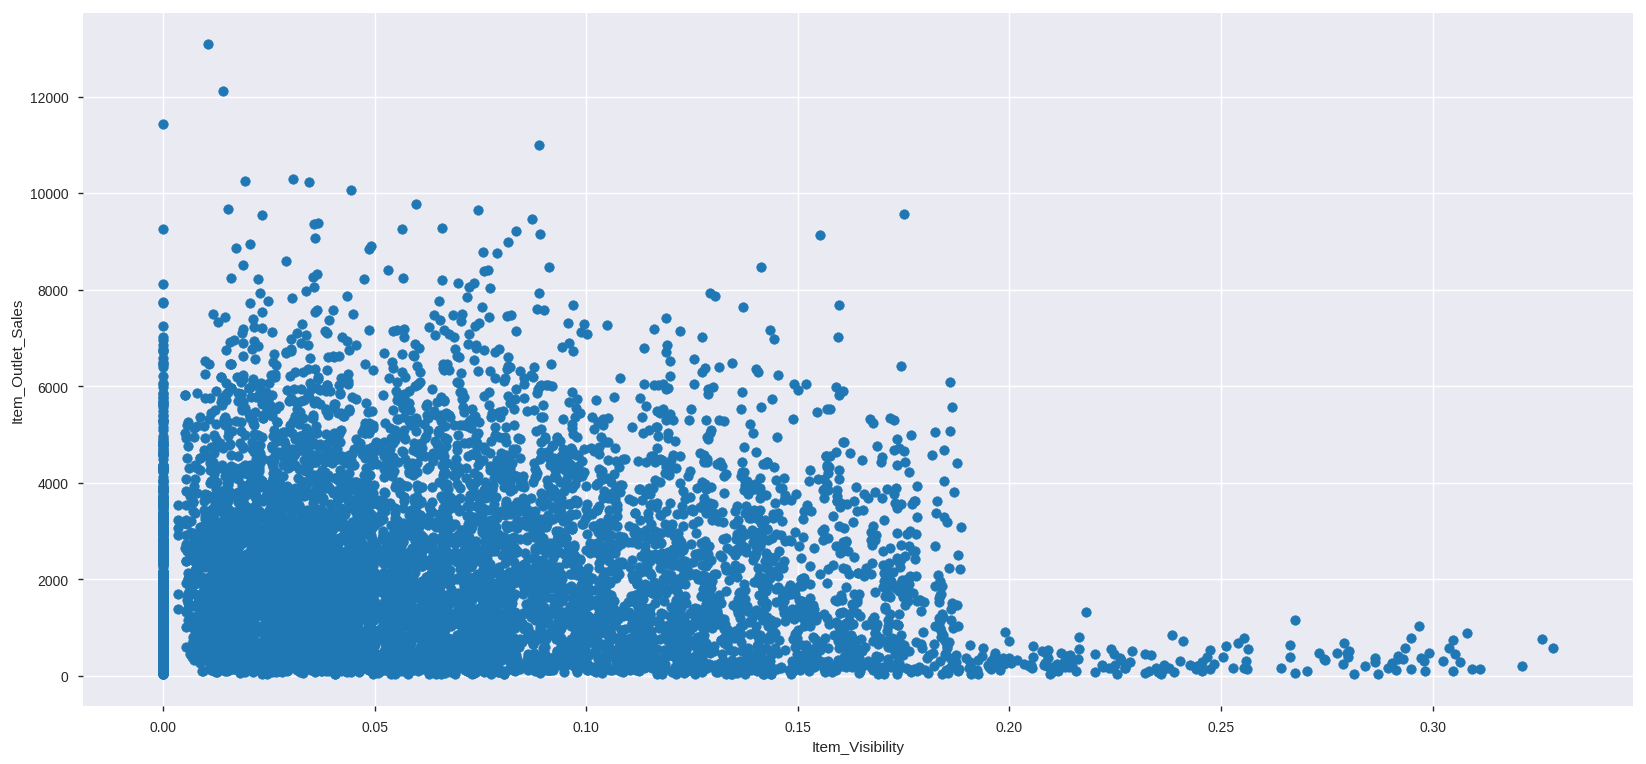

In [27]:
plt.figure(figsize=[20,9])
plt.scatter(df_train.Item_Visibility,df_train.Item_Outlet_Sales)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

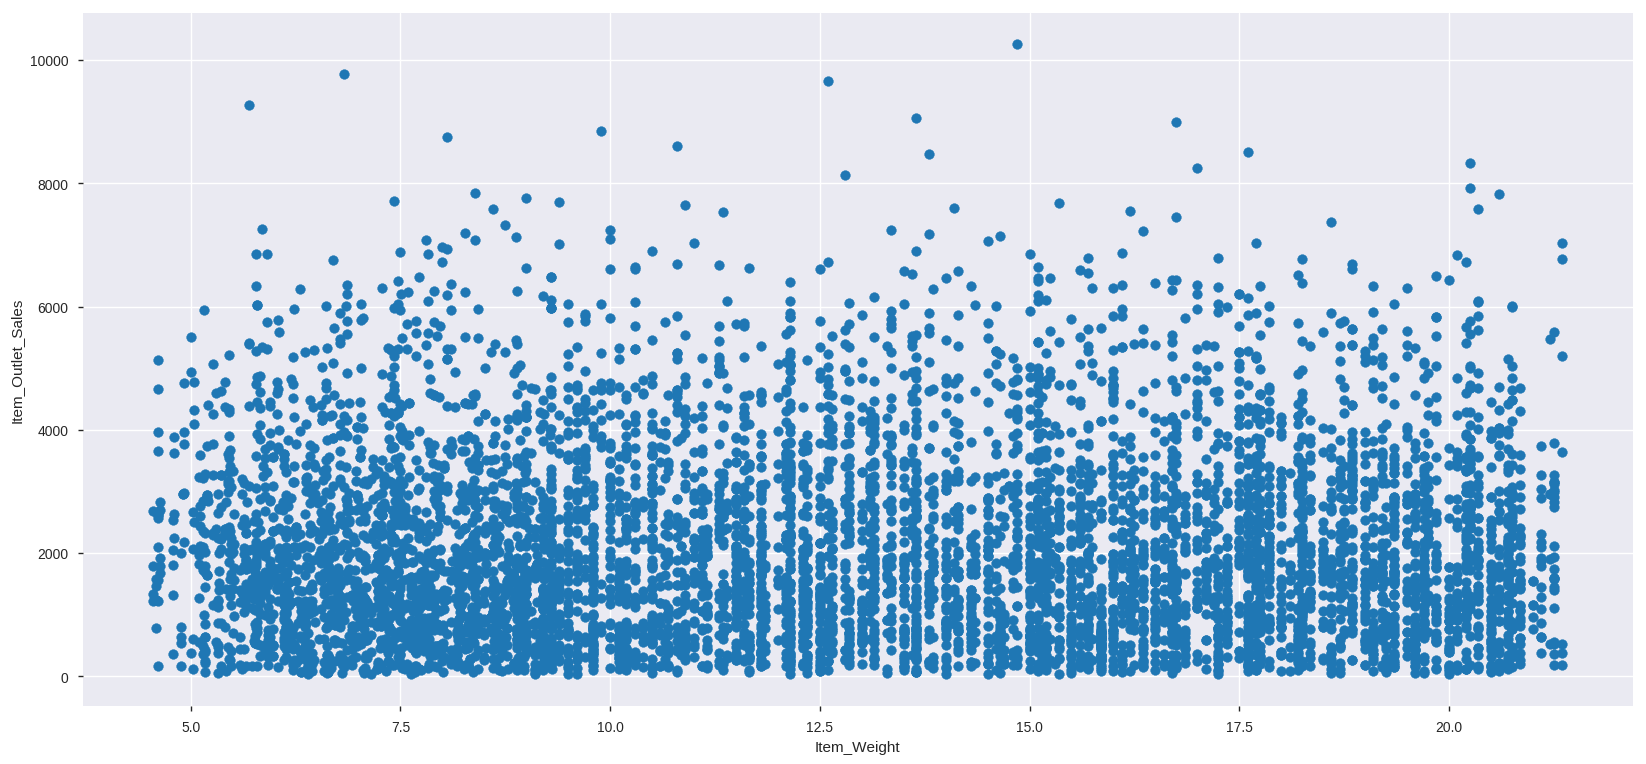

In [28]:
plt.figure(figsize=[20,9])
plt.scatter(df_train.Item_Weight,df_train.Item_Outlet_Sales)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

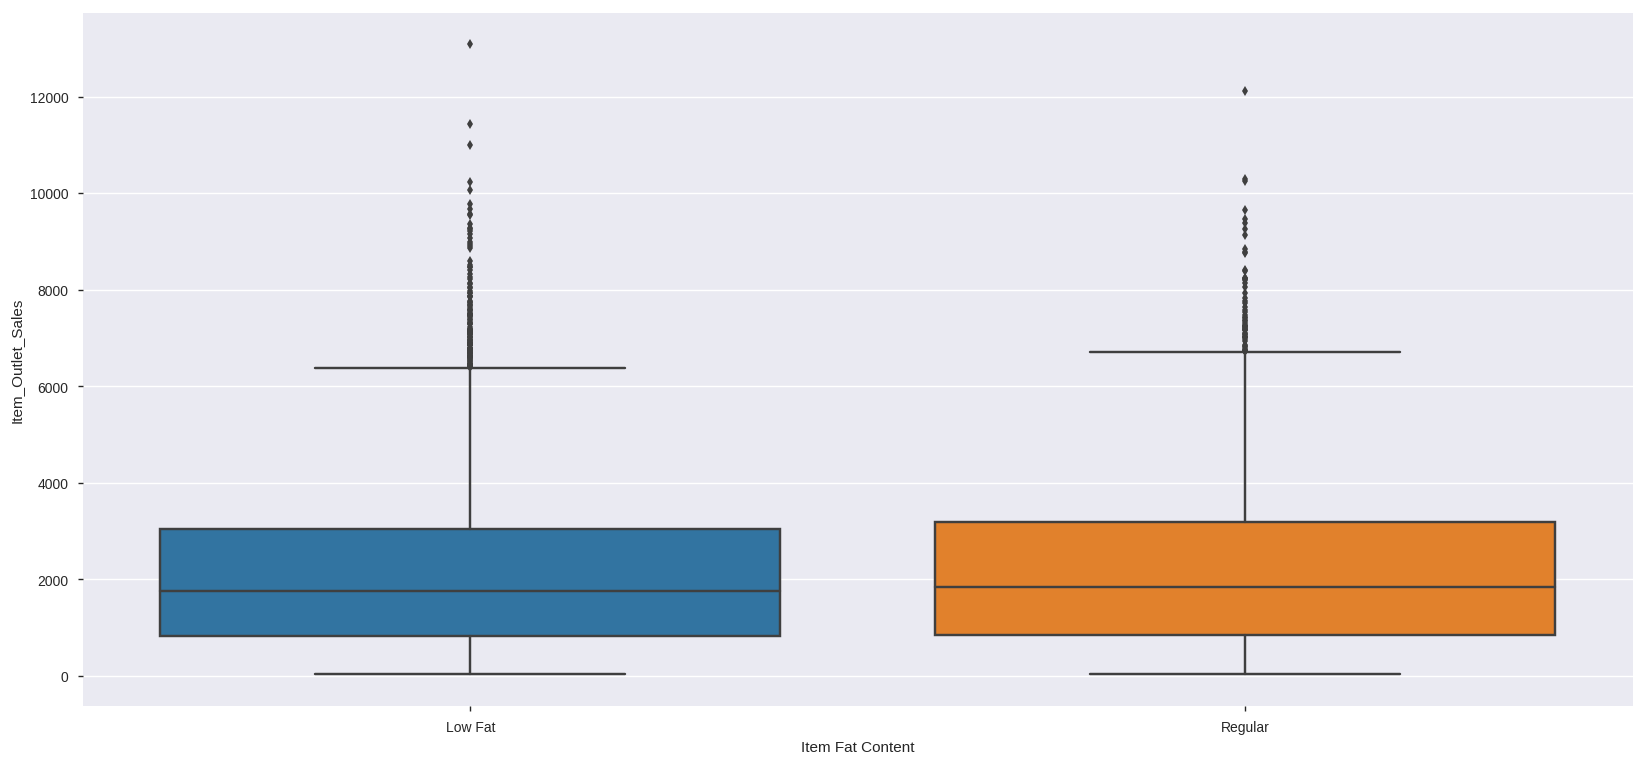

In [29]:
plt.figure(figsize=[20,9])
sns.boxplot(df_train.Item_Fat_Content,df_train.Item_Outlet_Sales)
plt.xlabel('Item Fat Content')
plt.ylabel('Item_Outlet_Sales')

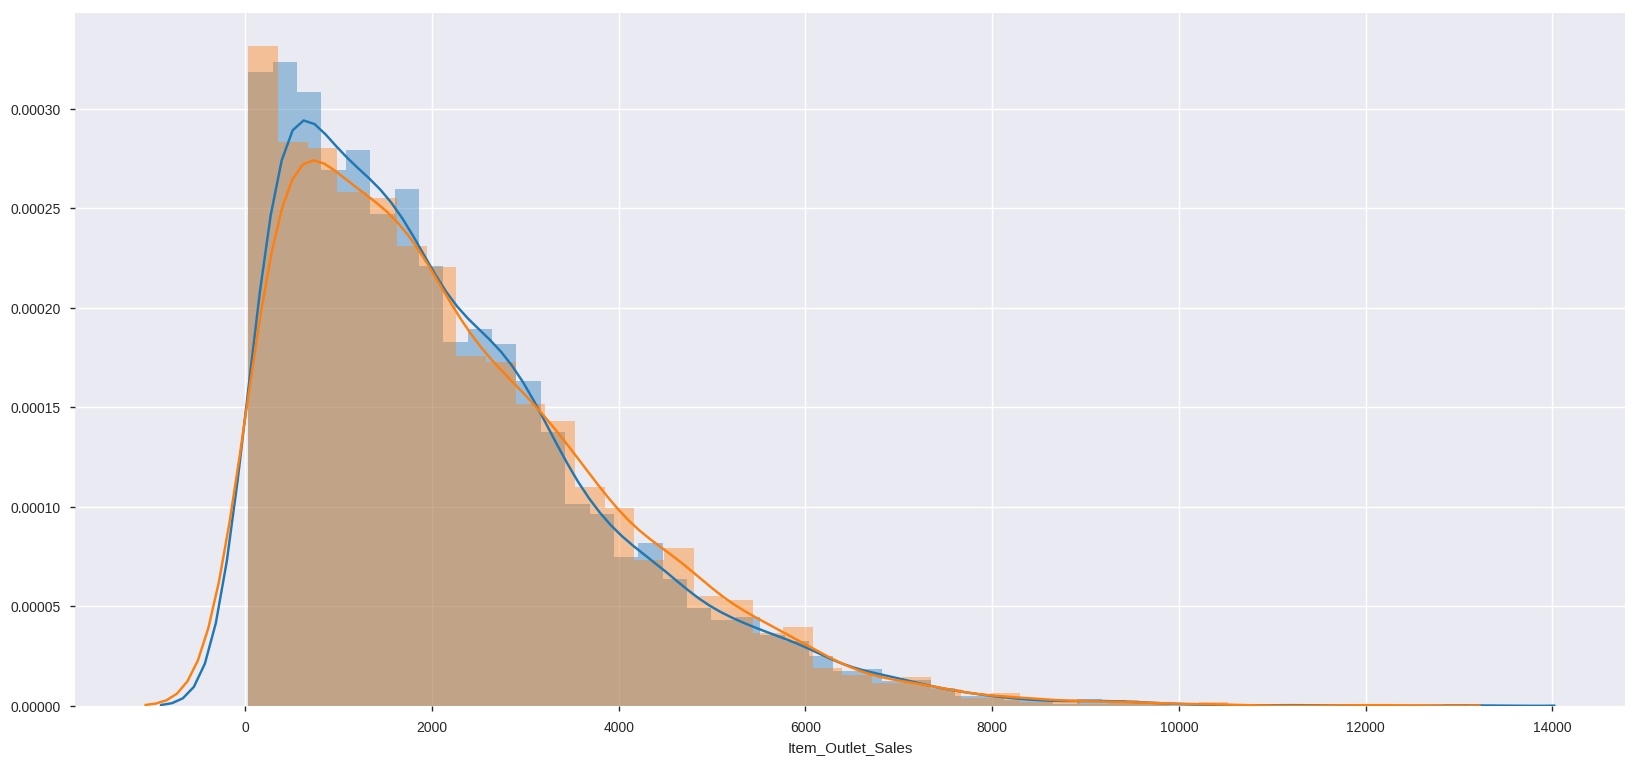

In [30]:
plt.figure(figsize=[20,9])
sns.distplot(df_train[df_train.Item_Fat_Content=='Low Fat']['Item_Outlet_Sales'])
sns.distplot(df_train[df_train.Item_Fat_Content=='Regular']['Item_Outlet_Sales'])

In [31]:
pd.pivot_table(df_train,'Item_Outlet_Sales',index='Item_Type',columns='Outlet_Size')

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,2050.901,2386.703,1724.682
Breads,2080.732,2718.245,2158.796
Breakfast,2104.287,2865.085,1715.989
Canned,2211.265,2562.075,2038.458
Dairy,2453.182,2725.361,1900.496
Frozen Foods,2214.096,2612.230,1895.490
Fruits and Vegetables,2405.118,2844.101,1931.258
Hard Drinks,2363.590,2551.079,1926.519
Health and Hygiene,1953.042,2475.143,1929.155


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

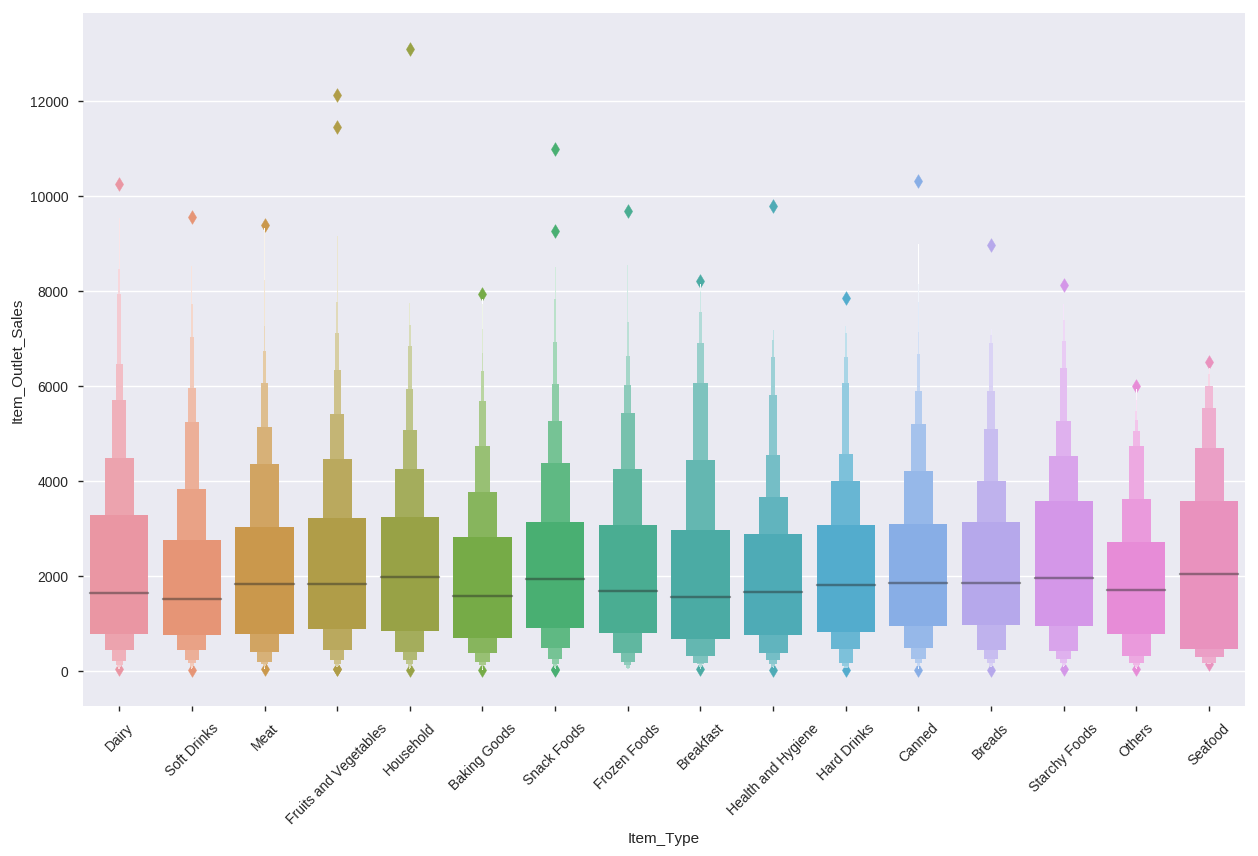

In [32]:
plt.figure(figsize=[15,9])
sns.boxenplot(df_train.Item_Type,df_train.Item_Outlet_Sales)
plt.xticks(rotation=45)

In [33]:
pd.pivot_table(df_train,'Item_Outlet_Sales',index='Outlet_Type',columns='Outlet_Size',aggfunc='sum',margins='Total') 

Outlet_Size,High,Medium,Small,All
Outlet_Type,,,,
Grocery Store,nan,nan,179694.094,179694.094
Supermarket Type1,2142663.578,2183969.810,4386518.104,8713151.492
Supermarket Type2,nan,1851822.830,nan,1851822.830
Supermarket Type3,nan,3453926.051,nan,3453926.051
All,2142663.578,7489718.692,4566212.197,14198594.467


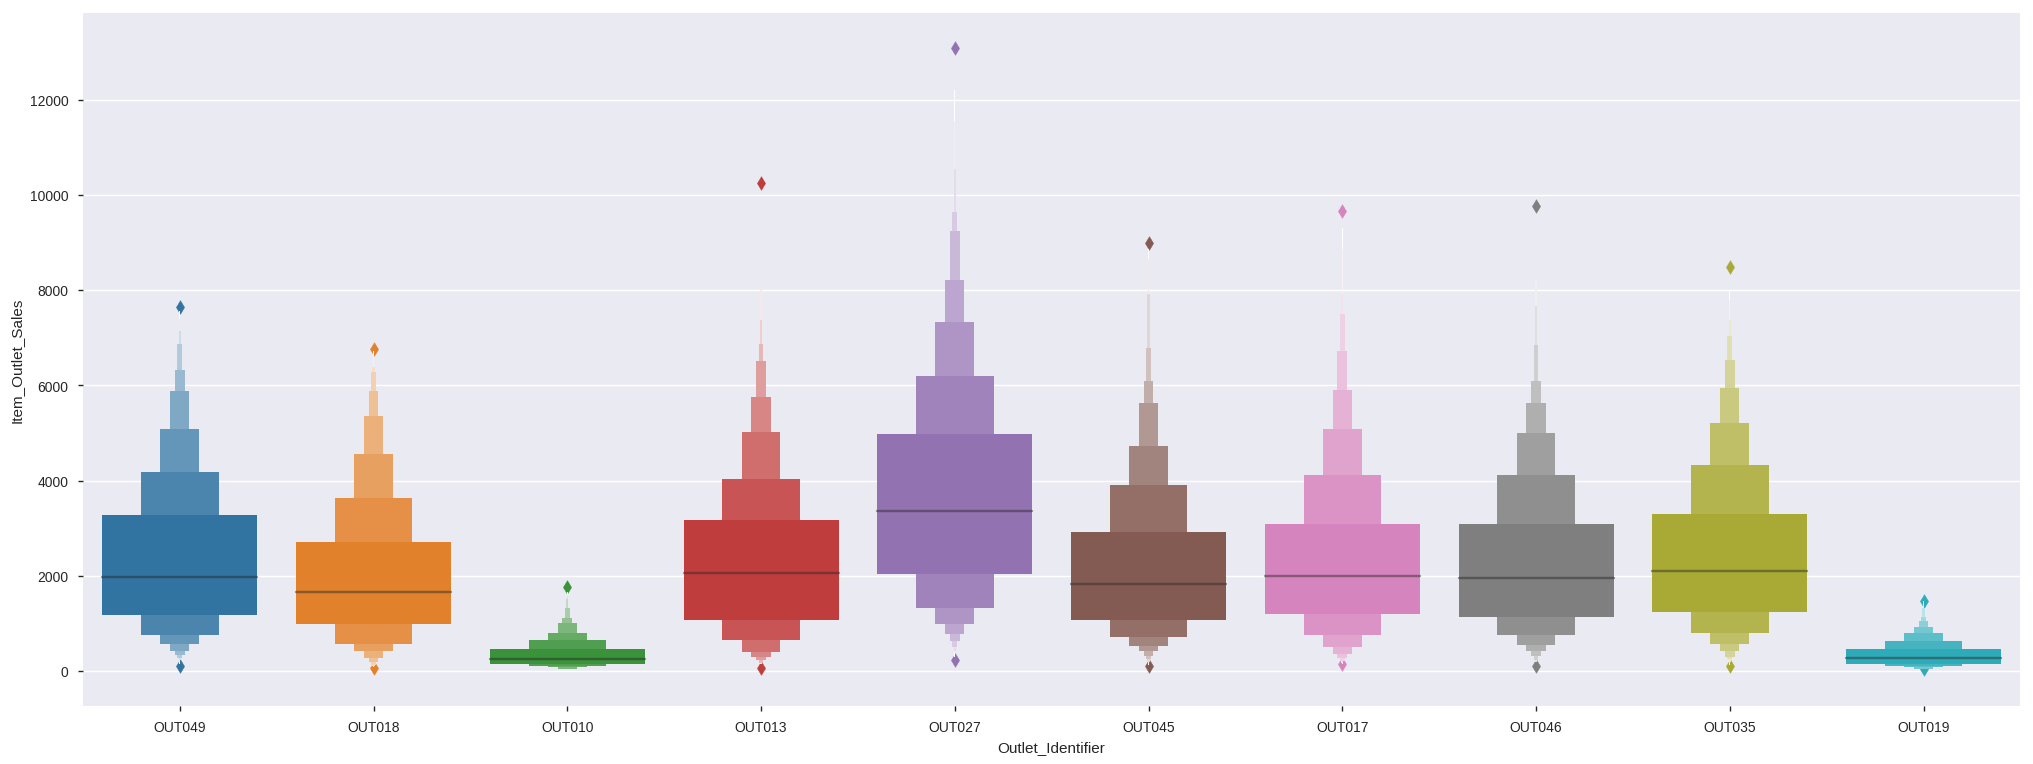

In [34]:
plt.figure(figsize=[25,9])
sns.boxenplot(df_train.Outlet_Identifier,df_train.Item_Outlet_Sales)

In [35]:
df_train[df_train.Outlet_Identifier=='OUT027']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,nan,Low Fat,0.127,Snack Foods,107.762,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.764
18,DRI11,nan,Low Fat,0.034,Hard Drinks,113.283,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.668
21,FDW12,nan,Regular,0.035,Baking Goods,144.544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.043
36,FDV20,nan,Regular,0.060,Fruits and Vegetables,128.068,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.692
38,FDX10,nan,Regular,0.123,Snack Foods,36.987,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.161
39,FDB34,nan,Low Fat,0.026,Snack Foods,87.620,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.495
62,FDF09,nan,Low Fat,0.012,Fruits and Vegetables,38.285,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.702
64,FDY45,nan,Low Fat,0.026,Snack Foods,255.836,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.356
84,FDR12,nan,Regular,0.031,Baking Goods,171.376,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.975
87,FDQ49,nan,Regular,0.039,Breakfast,155.963,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.723


In [36]:
df_train[df_train.Outlet_Identifier=='OUT027']['Item_Type'].value_counts()

Fruits and Vegetables    140
Snack Foods              137
Household                 99
Frozen Foods              89
Canned                    72
Baking Goods              69
Dairy                     67
Health and Hygiene        60
Meat                      56
Soft Drinks               45
Breads                    31
Hard Drinks               23
Others                    15
Starchy Foods             14
Breakfast                 11
Seafood                    7
Name: Item_Type, dtype: int64

In [37]:
2013-df_train[df_train.Outlet_Identifier=='OUT027']['Outlet_Establishment_Year'].unique()

array([28])

In [38]:
df_train[df_train.Outlet_Location_Type=='Tier 3']['Item_Outlet_Sales'].sum()

7636752.631999999

In [39]:
df_train[df_train.Outlet_Location_Type=='Tier 2']['Item_Outlet_Sales'].sum()

6472313.7064000005

In [40]:
df_train[df_train.Outlet_Location_Type=='Tier 1']['Item_Outlet_Sales'].sum()

4482059.072000001

In [41]:
2013-df_train[df_train.Outlet_Identifier=='OUT010']['Outlet_Establishment_Year'].unique()

array([15])

In [42]:
df_train[df_train.Outlet_Identifier=='OUT010']['Outlet_Type'].unique()

array(['Grocery Store'], dtype=object)

In [43]:
df_train[df_train.Outlet_Identifier=='OUT010']['Outlet_Size'].unique()

array([nan], dtype=object)

In [44]:
pd.pivot_table(df_train,'Item_Outlet_Sales',index='Outlet_Type',columns='Outlet_Size',aggfunc='sum',margins='Total')

Outlet_Size,High,Medium,Small,All
Outlet_Type,,,,
Grocery Store,nan,nan,179694.094,179694.094
Supermarket Type1,2142663.578,2183969.810,4386518.104,8713151.492
Supermarket Type2,nan,1851822.830,nan,1851822.830
Supermarket Type3,nan,3453926.051,nan,3453926.051
All,2142663.578,7489718.692,4566212.197,14198594.467


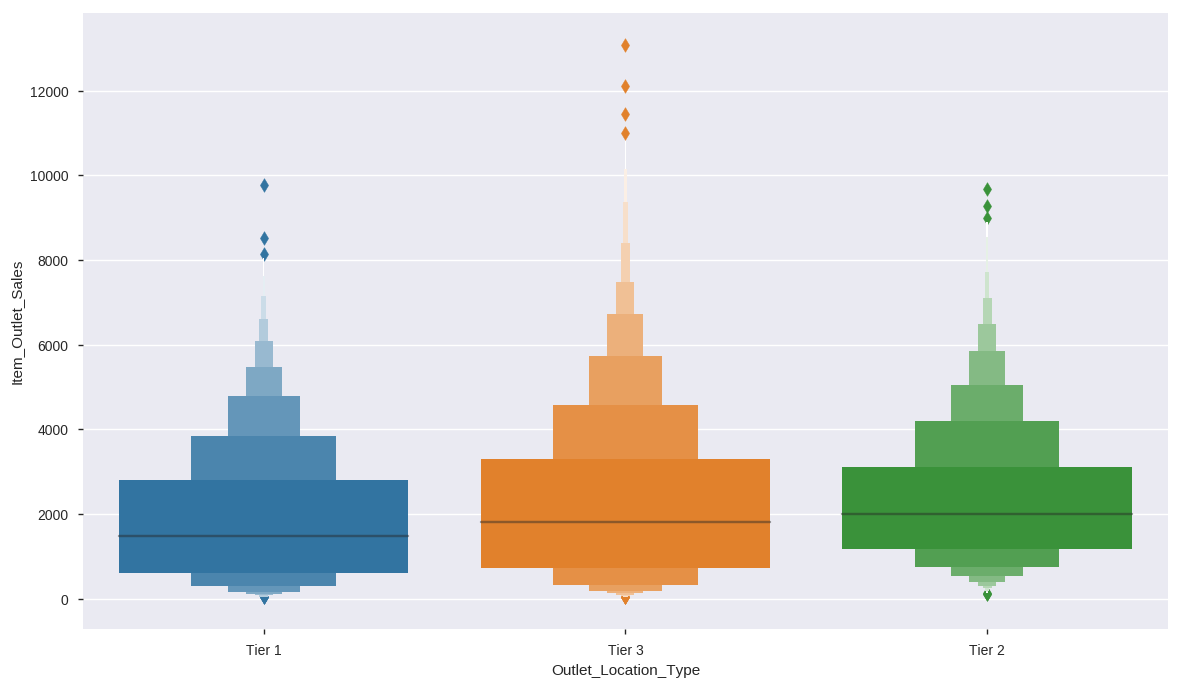

In [45]:
plt.figure(figsize=[14,8])
sns.boxenplot(df_train.Outlet_Location_Type,df_train.Item_Outlet_Sales)

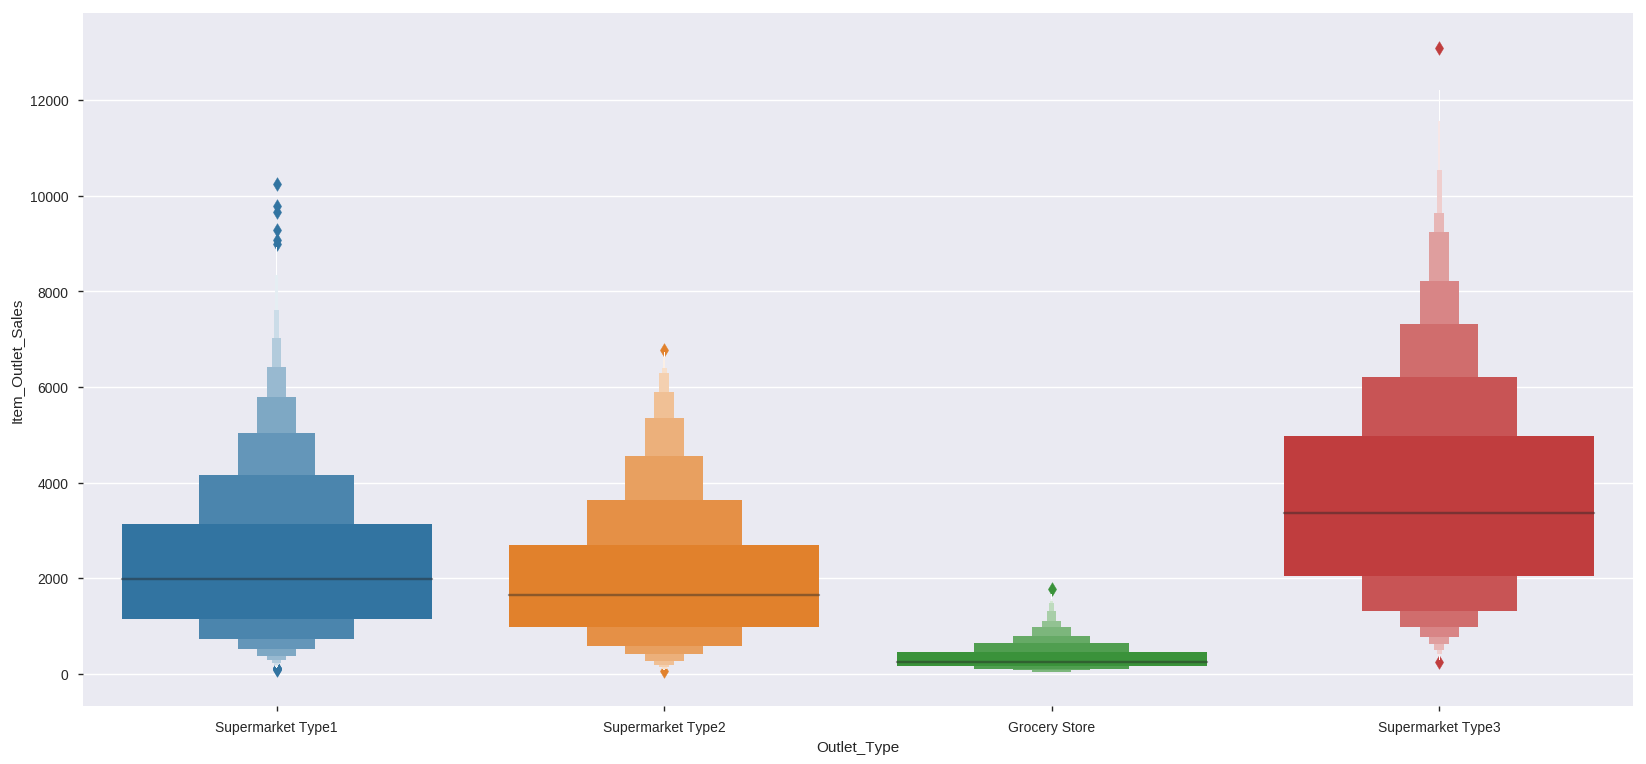

In [46]:
plt.figure(figsize=[20,9])
sns.boxenplot(df_train.Outlet_Type,df_train.Item_Outlet_Sales)

## Handling Missing Values

In [47]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [48]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [0]:
df_train.Outlet_Size = df_train.Outlet_Size.fillna('Medium')

In [0]:
df_test.Outlet_Size = df_test.Outlet_Size.fillna('Medium')

In [51]:
df_train.groupby('Item_Identifier').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600,0.032,141.865,2001.167,1843.600
DRA24,19.350,0.048,164.087,1995.000,2246.219
DRA59,8.270,0.135,185.180,1995.875,2614.430
DRB01,7.390,0.082,189.586,1990.333,1518.024
DRB13,6.115,0.008,189.693,1999.000,2428.838
DRB24,8.785,0.021,154.466,2003.000,3050.696
DRB25,12.300,0.077,106.894,1998.333,1661.504
DRB48,16.750,0.024,39.254,1996.714,622.903
DRC01,5.920,0.019,48.969,1997.833,862.211


In [0]:
df_train.Item_Weight=df_train.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.notnull().mean()))

In [0]:
df_test.Item_Weight=df_test.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.notnull().mean()))

In [0]:
df_test.Item_Weight.replace(0,10.5,inplace=True) #Replacing zeros in Item Weight with mean value

In [0]:
df_train.Item_Weight.replace(0,11,inplace=True)

In [94]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [95]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Feature Engineering

In [96]:
#price per unit
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,Medium,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


In [0]:
df_train['Item_Unit_Price'] = df_train.Item_MRP/df_train.Item_Weight

In [0]:
df_test['Item_Unit_Price'] = df_test.Item_MRP/df_test.Item_Weight

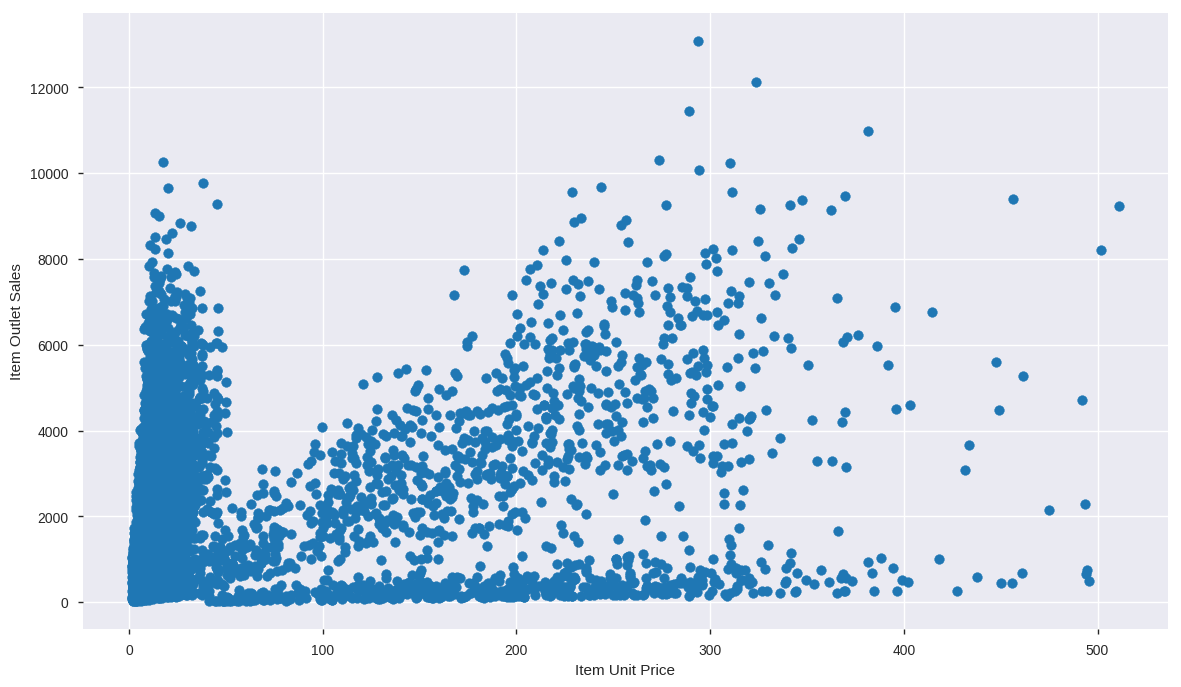

In [99]:
plt.figure(figsize=[14,8])
plt.scatter(df_train.Item_Unit_Price,df_train.Item_Outlet_Sales)
plt.xlabel('Item Unit Price')
plt.ylabel('Item Outlet Sales')
plt.show()

In [100]:
df_train['Existence_Years']=2013-df_train.Outlet_Establishment_Year
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Unit_Price,Existence_Years
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,26.861,14
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423,8.154,4
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270,8.092,14
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,Medium,Tier 3,Grocery Store,732.380,9.484,15
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705,6.032,26


In [101]:
df_test['Existence_Years']=2013-df_test.Outlet_Establishment_Year
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Unit_Price,Existence_Years
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198,14
1,FDW14,8.300,Regular,0.038,Dairy,87.320,OUT017,2007,Medium,Tier 2,Supermarket Type1,10.520,6
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,Medium,Tier 3,Grocery Store,16.558,15
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,Medium,Tier 2,Supermarket Type1,21.194,6
4,FDY38,0.750,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,Supermarket Type3,312.307,28


In [0]:
df_train.Item_Visibility=df_train.Item_Visibility.replace(0,df_train.Item_Visibility.mean())
#Replacing zeroes with mean value

In [0]:
df_test.Item_Visibility=df_test.Item_Visibility.replace(0,df_test.Item_Visibility.mean())

In [0]:
itemid=[]
for i in range(0,len(df_train.Item_Identifier)):
  itemid.append(df_train.Item_Identifier[i][:2])

In [0]:
df_train['Item Category'] = itemid

In [106]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Unit_Price,Existence_Years,Item Category
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,26.861,14,FD
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423,8.154,4,DR
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270,8.092,14,FD
3,FDX07,19.200,Regular,0.066,Fruits and Vegetables,182.095,OUT010,1998,Medium,Tier 3,Grocery Store,732.380,9.484,15,FD
4,NCD19,8.930,Low Fat,0.066,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705,6.032,26,NC


In [0]:
itemid=[]
for i in range(0,len(df_test.Item_Identifier)):
  itemid.append(df_test.Item_Identifier[i][:2])

In [108]:
df_test['Item Category'] = itemid
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Unit_Price,Existence_Years,Item Category
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198,14,FD
1,FDW14,8.300,Regular,0.038,Dairy,87.320,OUT017,2007,Medium,Tier 2,Supermarket Type1,10.520,6,FD
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,Medium,Tier 3,Grocery Store,16.558,15,NC
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,Medium,Tier 2,Supermarket Type1,21.194,6,FD
4,FDY38,0.750,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,Supermarket Type3,312.307,28,FD


In [109]:
df_train['Item Category'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item Category, dtype: int64

In [0]:
#Replacing Item Fat Content for Non Consumable Items

In [111]:
df_train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [112]:
df_train.shape

(8523, 15)

In [113]:
df_test.shape

(5681, 14)

In [0]:
newtrain  = df_train.drop(['Outlet_Establishment_Year','Item_Identifier','Item_Outlet_Sales'],axis=1)
newtest = df_test.drop(['Outlet_Establishment_Year','Item_Identifier'],axis=1)
y = df_train.Item_Outlet_Sales

In [0]:
dummy_train = pd.get_dummies(newtrain)
dummy_test = pd.get_dummies(newtest)

In [0]:
from scipy.stats import zscore

In [117]:
scaled_train = dummy_train.apply(zscore)
scaled_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Unit_Price,Existence_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item Category_DR,Item Category_FD,Item Category_NC
0,-0.239,-1.111,1.747,-0.212,-0.140,0.738,-0.738,-0.287,-0.174,-0.114,-0.287,3.391,-0.334,-0.411,-0.160,-0.255,-0.346,-0.229,-0.142,-0.087,-0.405,-0.235,-0.133,-0.264,-0.350,-0.349,-0.350,-0.257,-0.351,-0.350,-0.350,-0.350,2.857,-0.350,0.799,-0.624,1.603,-0.697,-0.805,-0.382,0.727,-0.350,-0.351,-0.322,0.626,-0.481
1,-0.782,-1.045,-1.489,-0.456,-1.334,-1.355,1.355,-0.287,-0.174,-0.114,-0.287,-0.295,-0.334,-0.411,-0.160,-0.255,-0.346,-0.229,-0.142,-0.087,-0.405,4.261,-0.133,-0.264,-0.350,-0.349,2.861,-0.257,-0.351,-0.350,-0.350,-0.350,-0.350,-0.350,0.799,-0.624,-0.624,-0.697,1.243,-0.382,-1.376,2.861,-0.351,3.109,-1.598,-0.481
2,1.080,-1.097,0.010,-0.456,-0.140,0.738,-0.738,-0.287,-0.174,-0.114,-0.287,-0.295,-0.334,-0.411,-0.160,-0.255,-0.346,4.365,-0.142,-0.087,-0.405,-0.235,-0.133,-0.264,-0.350,-0.349,-0.350,-0.257,-0.351,-0.350,-0.350,-0.350,2.857,-0.350,0.799,-0.624,1.603,-0.697,-0.805,-0.382,0.727,-0.350,-0.351,-0.322,0.626,-0.481
3,1.354,-0.084,0.660,-0.438,-0.020,-1.355,1.355,-0.287,-0.174,-0.114,-0.287,-0.295,-0.334,2.433,-0.160,-0.255,-0.346,-0.229,-0.142,-0.087,-0.405,-0.235,-0.133,3.789,-0.350,-0.349,-0.350,-0.257,-0.351,-0.350,-0.350,-0.350,-0.350,-0.350,0.799,-0.624,-0.624,-0.697,1.243,2.621,-1.376,-0.350,-0.351,-0.322,0.626,-0.481
4,-0.298,-0.084,-1.399,-0.483,1.294,0.738,-0.738,-0.287,-0.174,-0.114,-0.287,-0.295,-0.334,-0.411,-0.160,-0.255,2.892,-0.229,-0.142,-0.087,-0.405,-0.235,-0.133,-0.264,2.854,-0.349,-0.350,-0.257,-0.351,-0.350,-0.350,-0.350,-0.350,2.854,-1.252,-0.624,-0.624,-0.697,1.243,-0.382,0.727,-0.350,-0.351,-0.322,-1.598,2.081


In [118]:
scaled_test = dummy_test.apply(zscore)
scaled_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Unit_Price,Existence_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item Category_DR,Item Category_FD,Item Category_NC
0,1.631,-1.285,-0.537,-0.469,-0.140,0.741,-0.741,-0.289,-0.173,-0.116,-0.288,-0.295,-0.334,-0.399,-0.164,-0.252,-0.356,-0.241,-0.141,-0.066,2.490,-0.228,-0.148,-0.264,-0.350,-0.349,-0.349,-0.257,-0.351,-0.350,-0.350,-0.350,2.857,-0.350,0.799,-0.624,1.603,-0.697,-0.805,-0.382,0.727,-0.349,-0.351,-0.317,0.628,-0.486
1,-0.383,-0.648,-0.869,-0.410,-1.096,-1.350,1.350,-0.289,-0.173,-0.116,-0.288,3.393,-0.334,-0.399,-0.164,-0.252,-0.356,-0.241,-0.141,-0.066,-0.402,-0.228,-0.148,-0.264,-0.350,2.865,-0.349,-0.257,-0.351,-0.350,-0.350,-0.350,-0.350,-0.350,0.799,-0.624,-0.624,1.436,-0.805,-0.382,0.727,-0.349,-0.351,-0.317,0.628,-0.486
2,0.636,0.616,1.630,-0.343,-0.020,0.741,-0.741,-0.289,-0.173,-0.116,-0.288,-0.295,-0.334,-0.399,-0.164,-0.252,-0.356,-0.241,7.084,-0.066,-0.402,-0.228,-0.148,3.789,-0.350,-0.349,-0.349,-0.257,-0.351,-0.350,-0.350,-0.350,-0.350,-0.350,0.799,-0.624,-0.624,-0.697,1.243,2.621,-1.376,-0.349,-0.351,-0.317,-1.594,2.056
3,-0.542,-1.124,0.227,-0.291,-1.096,0.741,-0.741,-0.289,-0.173,-0.116,-0.288,-0.295,-0.334,-0.399,-0.164,-0.252,-0.356,-0.241,-0.141,-0.066,2.490,-0.228,-0.148,-0.264,-0.350,2.865,-0.349,-0.257,-0.351,-0.350,-0.350,-0.350,-0.350,-0.350,0.799,-0.624,-0.624,1.436,-0.805,-0.382,0.727,-0.349,-0.351,-0.317,0.628,-0.486
4,-1.604,1.009,1.508,2.942,1.532,-1.350,1.350,-0.289,-0.173,-0.116,-0.288,3.393,-0.334,-0.399,-0.164,-0.252,-0.356,-0.241,-0.141,-0.066,-0.402,-0.228,-0.148,-0.264,-0.350,-0.349,-0.349,-0.257,2.847,-0.350,-0.350,-0.350,-0.350,-0.350,0.799,-0.624,-0.624,-0.697,1.243,-0.382,-1.376,-0.349,2.847,-0.317,0.628,-0.486


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor()

In [0]:
model = rf.fit(scaled_train,y)

In [0]:
pred = model.predict(scaled_test)

In [0]:
final =pd.DataFrame({'Item_Identifier':df_test.Item_Identifier,'Outlet_Identifier':df_test.Outlet_Identifier,'Item_Outlet_Sales':pred})

In [0]:
from google.colab import files
final.to_csv('final.csv',index=False) 
files.download('final.csv')

## RMSE for base model is 1394

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
parameters = {'max_depth':[1,2,3,4,5,6,7], 
              'min_samples_leaf':[1,2,3,4,5,6], 
              'min_samples_split':[2,3,4,5]}
RSCV = RandomizedSearchCV(rf,parameters,scoring='neg_mean_squared_error',cv=10)
model = RSCV.fit(scaled_train,y)

In [143]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
rf1 = RandomForestRegressor(max_depth=6,min_samples_leaf=2,min_samples_split=3)

In [0]:
model = rf1.fit(scaled_train,y)
pred = model.predict(scaled_test)

In [0]:
final =pd.DataFrame({'Item_Identifier':df_test.Item_Identifier,'Outlet_Identifier':df_test.Outlet_Identifier,'Item_Outlet_Sales':pred})

In [0]:
from google.colab import files
final.to_csv('final_tuned.csv',index=False) 
files.download('final_tuned.csv')

## RMSE for the model after tuning hyper parameters is 1275

In [129]:
#feature selection using RFECV
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=rf1, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(scaled_train, y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', scaled_train.columns[rfecv.support_])

Optimal number of features : 20
Best features : Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Unit_Price',
       'Existence_Years', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Dairy',
       'Item_Type_Household', 'Item_Type_Meat', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT027', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1'],
      dtype='object')


In [0]:
cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Unit_Price',
       'Existence_Years', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Dairy',
       'Item_Type_Household', 'Item_Type_Meat', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT027', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1']

In [131]:
xtrain = scaled_train[cols]
xtrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Unit_Price,Existence_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Dairy,Item_Type_Household,Item_Type_Meat,Outlet_Identifier_OUT018,Outlet_Identifier_OUT027,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1
0,-0.239,-1.111,1.747,-0.212,-0.140,0.738,-0.738,-0.287,-0.174,-0.114,3.391,-0.346,-0.229,-0.350,-0.351,-0.350,0.799,-0.624,-0.382,0.727
1,-0.782,-1.045,-1.489,-0.456,-1.334,-1.355,1.355,-0.287,-0.174,-0.114,-0.295,-0.346,-0.229,2.861,-0.351,-0.350,0.799,-0.624,-0.382,-1.376
2,1.080,-1.097,0.010,-0.456,-0.140,0.738,-0.738,-0.287,-0.174,-0.114,-0.295,-0.346,4.365,-0.350,-0.351,-0.350,0.799,-0.624,-0.382,0.727
3,1.354,-0.084,0.660,-0.438,-0.020,-1.355,1.355,-0.287,-0.174,-0.114,-0.295,-0.346,-0.229,-0.350,-0.351,-0.350,0.799,-0.624,2.621,-1.376
4,-0.298,-0.084,-1.399,-0.483,1.294,0.738,-0.738,-0.287,-0.174,-0.114,-0.295,2.892,-0.229,-0.350,-0.351,2.854,-1.252,-0.624,-0.382,0.727


In [133]:
xtest = scaled_test[cols]
xtest.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Unit_Price,Existence_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Dairy,Item_Type_Household,Item_Type_Meat,Outlet_Identifier_OUT018,Outlet_Identifier_OUT027,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1
0,1.631,-1.285,-0.537,-0.469,-0.140,0.741,-0.741,-0.289,-0.173,-0.116,-0.295,-0.356,-0.241,-0.349,-0.351,-0.350,0.799,-0.624,-0.382,0.727
1,-0.383,-0.648,-0.869,-0.410,-1.096,-1.350,1.350,-0.289,-0.173,-0.116,3.393,-0.356,-0.241,-0.349,-0.351,-0.350,0.799,-0.624,-0.382,0.727
2,0.636,0.616,1.630,-0.343,-0.020,0.741,-0.741,-0.289,-0.173,-0.116,-0.295,-0.356,-0.241,-0.349,-0.351,-0.350,0.799,-0.624,2.621,-1.376
3,-0.542,-1.124,0.227,-0.291,-1.096,0.741,-0.741,-0.289,-0.173,-0.116,-0.295,-0.356,-0.241,-0.349,-0.351,-0.350,0.799,-0.624,-0.382,0.727
4,-1.604,1.009,1.508,2.942,1.532,-1.350,1.350,-0.289,-0.173,-0.116,3.393,-0.356,-0.241,-0.349,2.847,-0.350,0.799,-0.624,-0.382,-1.376


In [0]:
model = rf1.fit(xtrain,y)
pred = model.predict(xtest)

In [0]:
final =pd.DataFrame({'Item_Identifier':df_test.Item_Identifier,'Outlet_Identifier':df_test.Outlet_Identifier,'Item_Outlet_Sales':pred})
from google.colab import files
final.to_csv('final_fs.csv',index=False) 
files.download('final_fs.csv')

In [0]:
from sklearn.decomposition import PCA

## RMSE after Optimal Feature Selection using RFE CV is 1166

In [0]:
pca = PCA(0.95) # Selecting 95% explained variance is the main criteria instead of selecting no of componenets

In [0]:
pca.fit(xtrain)
x_train=pca.transform(xtrain)
x_test=pca.transform(xtest)


In [159]:
pca.n_components_

14

In [0]:
model = rf1.fit(x_train,y)
pred = model.predict(x_test)

In [0]:
final =pd.DataFrame({'Item_Identifier':df_test.Item_Identifier,'Outlet_Identifier':df_test.Outlet_Identifier,'Item_Outlet_Sales':pred})
from google.colab import files
final.to_csv('final_pca.csv',index=False) 
files.download('final_pca.csv')

## RMSE after dimension reduction using PCA is 1262

In [0]:
parameters = {'max_depth':[1,2,3,4,5,6,7], 
              'min_samples_leaf':[1,2,3,4,5,6], 
              'min_samples_split':[2,3,4,5]}
RSCV = RandomizedSearchCV(rf,parameters,scoring='neg_mean_squared_error',cv=10)
model = RSCV.fit(xtrain,y)

In [152]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
rf2 = RandomForestRegressor(max_depth=6,min_samples_leaf=6,min_samples_split=3)
model = rf2.fit(xtrain,y)
pred = model.predict(xtest)

In [0]:
final =pd.DataFrame({'Item_Identifier':df_test.Item_Identifier,'Outlet_Identifier':df_test.Outlet_Identifier,'Item_Outlet_Sales':pred})
from google.colab import files
final.to_csv('final_rscv.csv',index=False) 
files.download('final_rscv.csv')

## RMSE after tuning hyper parameters again with the selected optimal features is 1165